# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))



573


In [3]:
# Save config information from openweather url.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# set up lists to hold reponse info that will be used in a DataFrame
lat = []
lon = []
temp = []
windspeed =[]
hum = []
cloud = []
dt = []
country = []
city_name = []

# Loop through the list of cities and perform a request for data on each
for i,city in enumerate(cities):

    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        windspeed.append((response['wind']['speed']))
        cloud.append(response['clouds']['all'])
        dt.append(response['dt'])
        country.append(response['sys']['country'])
        city_name.append(city)
        print(f"Processing record {i} | {city}")
    except:
     
        print("City not found")

Processing record 0 | ushuaia
Processing record 1 | kapaa
Processing record 2 | dikson
Processing record 3 | cape town
Processing record 4 | atuona
Processing record 5 | lebu
Processing record 6 | rikitea
Processing record 7 | punta arenas
Processing record 8 | hithadhoo
Processing record 9 | floresta
Processing record 10 | myitkyina
Processing record 11 | airai
Processing record 12 | plettenberg bay
Processing record 13 | rybnoye
Processing record 14 | mancio lima
Processing record 15 | san andres
Processing record 16 | saskylakh
Processing record 17 | new norfolk
Processing record 18 | port alfred
Processing record 19 | busselton
Processing record 20 | albany
Processing record 21 | evensk
Processing record 22 | bluff
City not found
City not found
Processing record 25 | dana point
Processing record 26 | edson
Processing record 27 | thompson
City not found
Processing record 29 | mataura
Processing record 30 | port elizabeth
Processing record 31 | dunda
Processing record 32 | dingle
Cit

Processing record 264 | pavlikeni
Processing record 265 | padang
Processing record 266 | xining
Processing record 267 | westport
Processing record 268 | diamantina
Processing record 269 | yar-sale
Processing record 270 | ugoofaaru
Processing record 271 | port hedland
Processing record 272 | omaruru
Processing record 273 | esperance
Processing record 274 | rio grande
Processing record 275 | moron
Processing record 276 | yulara
Processing record 277 | gorokhovets
Processing record 278 | ulaangom
City not found
Processing record 280 | canatlan
Processing record 281 | lavrentiya
Processing record 282 | kosh-agach
Processing record 283 | necochea
Processing record 284 | acari
City not found
Processing record 286 | coquimbo
Processing record 287 | manakara
Processing record 288 | dobryatino
Processing record 289 | longhua
Processing record 290 | krasnoselkup
City not found
City not found
Processing record 293 | oud-beijerland
Processing record 294 | faanui
Processing record 295 | thiruvanant

Processing record 520 | dudinka
Processing record 521 | itarema
Processing record 522 | angoche
Processing record 523 | muros
Processing record 524 | maloy
Processing record 525 | nanjing
Processing record 526 | ghatanji
Processing record 527 | kindia
Processing record 528 | palimbang
Processing record 529 | binzhou
Processing record 530 | isaka
Processing record 531 | quatre cocos
Processing record 532 | brownsville
Processing record 533 | sorland
Processing record 534 | lahad datu
Processing record 535 | punalur
City not found
Processing record 537 | abnub
Processing record 538 | kattivakkam
Processing record 539 | pavagada
Processing record 540 | giaveno
Processing record 541 | nishihara
Processing record 542 | dutse
Processing record 543 | gubkinskiy
Processing record 544 | goundam
City not found
Processing record 546 | xinzhi
City not found
City not found
Processing record 549 | machiques
Processing record 550 | bosaso
Processing record 551 | peterhead
Processing record 552 | balo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Converting raw data to a DataFrame
weather_df = pd.DataFrame({"City":city_name,
             "Lat":lat,
             "Lng":lon,
             "Max Temp":temp,
             "Humidity":hum,
             "Cloudiness":cloud,
             "Wind Speed":windspeed,
             "Country":country,
             "Date":dt
             })


In [8]:
#Exporting the DataFrame weather_df in a csv file and reading the DataFrame
weather_df.to_csv("weather.csv")
weather_df.head() 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,50.00,66,75,4.61,AR,1616845069
1,kapaa,22.0752,-159.3190,73.40,83,1,13.80,US,1616845159
2,dikson,73.5069,80.5464,-11.07,98,28,8.70,RU,1616845160
3,cape town,-33.9258,18.4232,72.00,52,20,18.41,ZA,1616844916
4,atuona,-9.8000,-139.0333,80.02,79,86,19.37,PF,1616845161


In [60]:
# A summary statistics was displayed
summary_df = weather_df[["Lat","Lng","Max Temp", "Humidity","Cloudiness","Wind Speed", "Date"]].describe()
summary_df.to_csv("summary.csv")
summary_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,5.210000e+02
mean,20.890001,14.168091,58.010154,69.111324,50.988484,8.038388,1.616845e+09
std,32.618822,89.936015,28.039787,24.265025,37.651691,6.243449,9.135932e+01
min,-54.800000,-175.200000,-29.380000,3.000000,0.000000,0.090000,1.616845e+09
25%,-8.103000,-66.865400,41.000000,57.000000,16.000000,3.510000,1.616845e+09
50%,23.613700,22.266700,64.990000,74.000000,55.000000,5.790000,1.616845e+09
75%,48.649900,88.666700,79.750000,87.000000,90.000000,10.360000,1.616845e+09
max,78.218600,179.316700,104.610000,100.000000,100.000000,34.520000,1.616845e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
weather_df.loc[weather_df["Humidity"]>100]


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
# As no city was listed with humidity >100%, this step will be skipped.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This chart shows how latitude influences the temperature. The Southern Hemispher is warmer than the Northern. Cities with latitude -40 to -60 in the Southern Hemisphere are way warmer than cities with Latitude 40 to 60 in the Northern Hemisphere.


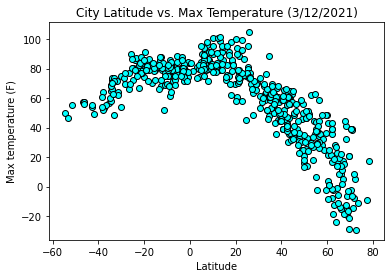

In [23]:
x_axis = weather_df["Lat"]
y_axis = weather_df["Max Temp"]
plt.title("City Latitude vs. Max Temperature (3/12/2021)") # To ask help
plt.xlabel("Latitude")
plt.ylabel("Max temperature (F)")
plt.scatter(x_axis, y_axis,marker="o", facecolors="cyan", edgecolors="black")
plt.plot()
print("This chart shows how latitude influences the temperature. The Southern Hemispher is warmer than the Northern. Cities with latitude -40 to -60 in the Southern Hemisphere are way warmer than cities with Latitude 40 to 60 in the Northern Hemisphere.")

#Latitude vs. Humidity Plot

This chart shows how latitude influences the humidity. We can see that humidity around 20% or lower are found in latitudes betwen 0 -40, which are in the Northern Hemisfere, but very close to the Equatorial line.  


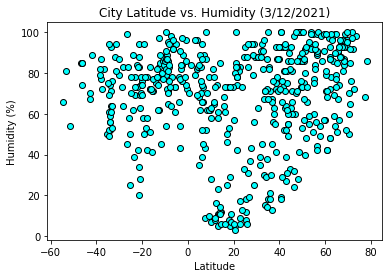

In [24]:
x_axis = weather_df["Lat"]
y_axis = weather_df["Humidity"]
plt.title("City Latitude vs. Humidity (3/12/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(x_axis, y_axis,marker="o", facecolors="cyan", edgecolors="black")
plt.plot()
print("This chart shows how latitude influences the humidity. We can see that humidity around 20% or lower are found in latitudes between 0 -40, which are in the Northern Hemisfere, but very close to the Equatorial line.  ")

##### Latitude vs. Cloudiness Plot

This chart shows how latitude influences the cloudiness. We can see that there is not that much relation between those two parameters.  


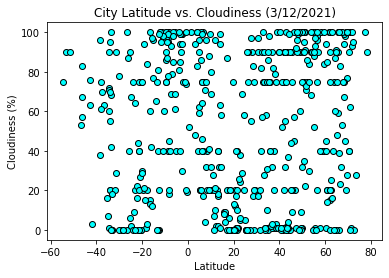

In [25]:

x_axis = weather_df["Lat"]
y_axis = weather_df["Cloudiness"]
plt.title("City Latitude vs. Cloudiness (3/12/2021)") # To ask help
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(x_axis, y_axis,marker="o", facecolors="cyan", edgecolors="black")
plt.plot()
print("This chart shows how latitude influences the cloudiness. We can see that there is not that much relation between those two parameters.  ")

## Latitude vs. Wind Speed Plot

This chart shows how latitude influences the wind speed. Most of the cities from our data set has wind speed below 15 mph, but for the few cities that has higer values of wind speed, they are mostly located at the Northern Hemisphere.


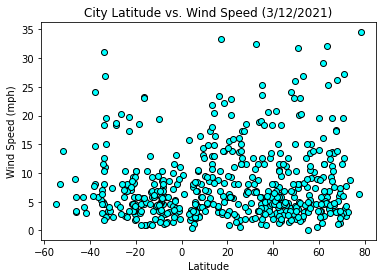

In [26]:
x_axis = weather_df["Lat"]
y_axis = weather_df["Wind Speed"]
plt.title("City Latitude vs. Wind Speed (3/12/2021)") # To ask help
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(x_axis, y_axis,marker="o", facecolors="cyan", edgecolors="black")
plt.plot()
print("This chart shows how latitude influences the wind speed. Most of the cities from our data set has wind speed below 15 mph, but for the few cities that has higer values of wind speed, they are mostly located at the Northern Hemisphere.")

## Linear Regression

In [28]:
#Separate the data in 2 dataframes to get the North and the South regions for ploting

#North ['Lat']>=0]
n_weather_df = weather_df.loc[weather_df['Lat']>=0]
n_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,kapaa,22.0752,-159.3190,73.40,83,1,13.80,US,1616845159
2,dikson,73.5069,80.5464,-11.07,98,28,8.70,RU,1616845160
10,myitkyina,25.3833,97.4000,81.07,18,0,0.65,MM,1616845164
13,rybnoye,54.7256,39.5119,35.46,99,100,7.58,RU,1616845165
15,san andres,12.5847,-81.7006,80.60,74,20,17.27,CO,1616845166


In [29]:
#South ['Lat']<0]
s_weather_df = weather_df.loc[weather_df['Lat']<0]
s_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,50.00,66,75,4.61,AR,1616845069
3,cape town,-33.9258,18.4232,72.00,52,20,18.41,ZA,1616844916
4,atuona,-9.8000,-139.0333,80.02,79,86,19.37,PF,1616845161
5,lebu,-37.6167,-73.6500,53.35,72,70,14.67,CL,1616845161
6,rikitea,-23.1203,-134.9692,79.54,69,64,19.82,PF,1616845162


In [50]:
#Using a unic function to simplify the plotting steps
def correlation_plot(x, y,
                     title,
                     xlabel, ylabel, xmin, ymin):
    plt.scatter(x, y)
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(xmin,ymin),fontsize=14,color="red")
      
    
    print(f'r-value is = {r_value**2}')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
     
    plt.show


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value is = 0.7813374606932812


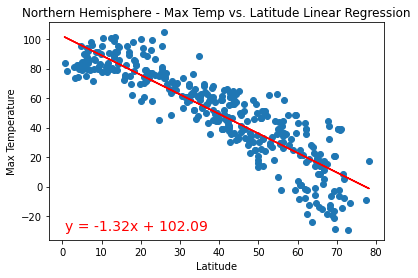

In [52]:
x = n_weather_df["Lat"]
y = n_weather_df["Max Temp"]
xmin = n_weather_df["Lat"].min()
ymin = n_weather_df["Max Temp"].min()
title = "Northern Hemisphere - Max Temp vs. Latitude Linear Regression"
xlabel = "Latitude"
ylabel = "Max Temperature"
correlation_plot(x, y, title, xlabel, ylabel, xmin, ymin)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value is = 0.41161915921901976


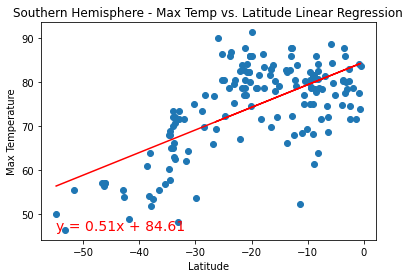

In [53]:
x = s_weather_df["Lat"]
y = s_weather_df["Max Temp"]
xmin = s_weather_df["Lat"].min()
ymin = s_weather_df["Max Temp"].min()
title = "Southern Hemisphere - Max Temp vs. Latitude Linear Regression"
xlabel = "Latitude"
ylabel = "Max Temperature"
correlation_plot(x, y, title, xlabel, ylabel, xmin, ymin)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value is = 0.13138818299772334


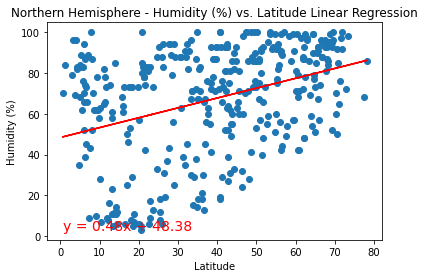

In [54]:
x = n_weather_df["Lat"]
y = n_weather_df["Humidity"]
xmin = n_weather_df["Lat"].min()
ymin = n_weather_df["Humidity"].min()
title = "Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression"
xlabel = "Latitude"
ylabel = "Humidity (%)"
correlation_plot(x, y, title, xlabel, ylabel, xmin, ymin)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value is = 0.035856514194205685


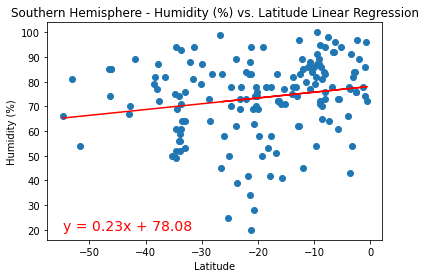

In [55]:
x = s_weather_df["Lat"]
y = s_weather_df["Humidity"]
xmin = s_weather_df["Lat"].min()
ymin = s_weather_df["Humidity"].min()
title = "Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression"
xlabel = "Latitude"
ylabel = "Humidity (%)"
correlation_plot(x, y, title, xlabel, ylabel, xmin, ymin)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value is = 0.0405924995127131


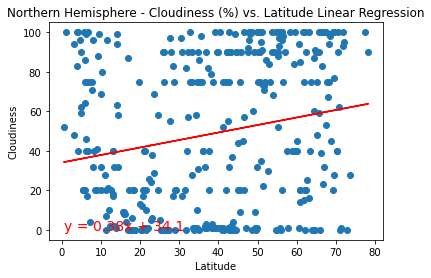

In [56]:
x = n_weather_df["Lat"]
y = n_weather_df["Cloudiness"]
xmin = n_weather_df["Lat"].min()
ymin = n_weather_df["Cloudiness"].min()
title = "Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression"
xlabel = "Latitude"
ylabel = "Cloudiness"
correlation_plot(x, y, title, xlabel, ylabel, xmin, ymin)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value is = 0.05881056668191563


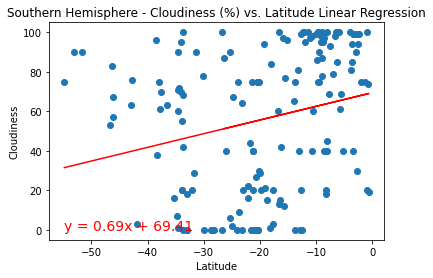

In [57]:
x = s_weather_df["Lat"]
y = s_weather_df["Cloudiness"]
xmin = s_weather_df["Lat"].min()
ymin = s_weather_df["Cloudiness"].min()
title = "Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression"
xlabel = "Latitude"
ylabel = "Cloudiness"
correlation_plot(x, y, title, xlabel, ylabel, xmin, ymin)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value is = 0.001096638361694317


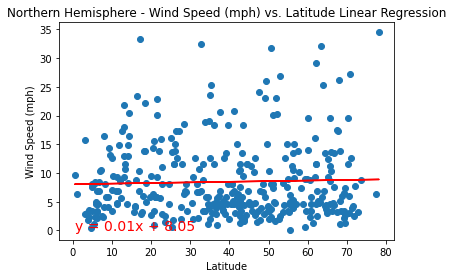

In [58]:
x = n_weather_df["Lat"]
y = n_weather_df["Wind Speed"]
xmin = n_weather_df["Lat"].min()
ymin = n_weather_df["Wind Speed"].min()
title = "Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression"
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"
correlation_plot(x, y, title, xlabel, ylabel, xmin, ymin)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value is = 0.04588843437678633


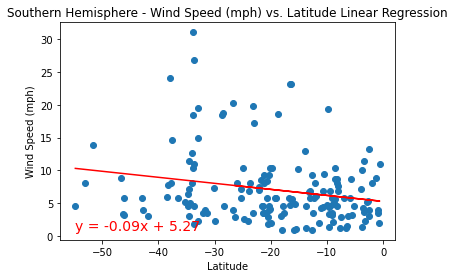

In [59]:
x = s_weather_df["Lat"]
y = s_weather_df["Wind Speed"]
xmin = s_weather_df["Lat"].min()
ymin = s_weather_df["Wind Speed"].min()
title = "Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression"
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"
correlation_plot(x, y, title, xlabel, ylabel, xmin, ymin)